### 1 - Import test data

In [100]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
from backtesting import Strategy
from backtesting import Backtest
from sklearn.model_selection import ParameterGrid

In [101]:
def getYFinanceData(ticker, period, interval):
  dataF = yf.download(ticker, period=period, interval=interval)

  dataF.iloc[:,:]
  #dataF.Open.iloc

  df = pd.DataFrame(dataF)

  # use df index, convert DateTime to  a column instead of index
  df.reset_index(inplace=True)

  # delete Adj Close
  df = df.drop(['Adj Close'], axis=1)

  # rename Datetime to "Gmt time"
  df = df.rename(columns={'Datetime':'Gmt time'})
  
  # rename Date to "Gmt time"
  df = df.rename(columns={'Date':'Gmt time'})

  df['Gmt time']=pd.to_datetime(df['Gmt time'],format='%d.%m.%Y %H:%M:%S')
  df.set_index("Gmt time", inplace=True)
  df=df[df.High!=df.Low]

  return df

In [102]:
import pandas as pd
import pandas_ta as ta

# df = pd.read_csv("EURUSD_Candlestick_5_M_BID_01.02.2023-17.02.2024.csv")
df = getYFinanceData("EURJPY=X", "15d", "15m")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Gmt time,,,,,
2024-04-01 00:00:00,163.259995,163.307007,163.238998,163.283005,0
2024-04-01 00:15:00,163.281006,163.317993,163.251007,163.309006,0
2024-04-01 00:30:00,163.309006,163.403000,163.302002,163.388000,0
2024-04-01 00:45:00,163.384003,163.423004,163.367996,163.408997,0
2024-04-01 01:00:00,163.406998,163.421997,163.335999,163.341003,0
...,...,...,...,...,...
2024-04-19 20:45:00,164.673004,164.731995,164.658005,164.722000,0
2024-04-19 21:00:00,164.720001,164.748001,164.712006,164.738007,0
2024-04-19 21:15:00,164.738007,164.768005,164.735001,164.759003,0


In [103]:
df["EMA_slow"]=ta.ema(df.Close, length=50)
df["EMA_fast"]=ta.ema(df.Close, length=30)
df['RSI']=ta.rsi(df.Close, length=10)
my_bbands = ta.bbands(df.Close, length=15, std=1.5)
df['ATR']=ta.atr(df.High, df.Low, df.Close, length=7)
df=df.join(my_bbands)
df

,Open,High,Low,Close,Volume,EMA_slow,EMA_fast,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5
Gmt time,,,,,,,,,,,,,,
2024-04-01 00:00:00,163.259995,163.307007,163.238998,163.283005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01 00:15:00,163.281006,163.317993,163.251007,163.309006,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01 00:30:00,163.309006,163.403000,163.302002,163.388000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01 00:45:00,163.384003,163.423004,163.367996,163.408997,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01 01:00:00,163.406998,163.421997,163.335999,163.341003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-19 20:45:00,164.673004,164.731995,164.658005,164.722000,0,164.642313,164.683149,53.715903,0.081811,164.572040,164.665934,164.759828,0.114042,0.798559
2024-04-19 21:00:00,164.720001,164.748001,164.712006,164.738007,0,164.646065,164.686688,55.407874,0.075266,164.613672,164.682068,164.750464,0.083065,0.908931
2024-04-19 21:15:00,164.738007,164.768005,164.735001,164.759003,0,164.650494,164.691354,57.663547,0.069229,164.620007,164.690668,164.761328,0.085810,0.983544


In [104]:
# def ema_signal(df, current_candle, backcandles):
#     df_slice = df.reset_index().copy()
#     # Get the range of candles to consider
#     start = max(0, current_candle - backcandles)
#     end = current_candle
#     relevant_rows = df_slice.iloc[start:end]

#     # Check if all EMA_fast values are below EMA_slow values
#     if all(relevant_rows["EMA_fast"] < relevant_rows["EMA_slow"]):
#         return 1
#     elif all(relevant_rows["EMA_fast"] > relevant_rows["EMA_slow"]):
#         return 2
#     else:
#         return 0


# df = df[-40000:-1]
# df.reset_index(inplace=True, drop=True)
# from tqdm import tqdm
# tqdm.pandas()
# df['EMASignal'] = df.progress_apply(lambda row: ema_signal(df, row.name, 7) if row.name >= 20 else 0, axis=1)


#--------------------------------------------------------------------------------------------------------------------
def ema_signal(df, backcandles):
    # Create boolean Series for conditions
    above = df['EMA_fast'] > df['EMA_slow']
    below = df['EMA_fast'] < df['EMA_slow']

    # Rolling window to check if condition is met consistently over the window
    above_all = above.rolling(window=backcandles).apply(lambda x: x.all(), raw=True).fillna(0).astype(bool)
    below_all = below.rolling(window=backcandles).apply(lambda x: x.all(), raw=True).fillna(0).astype(bool)

    # Assign signals based on conditions
    df['EMASignal'] = 0  # Default no signal
    df.loc[above_all, 'EMASignal'] = 2  # Signal 2 where EMA_fast consistently above EMA_slow
    df.loc[below_all, 'EMASignal'] = 1  # Signal 1 where EMA_fast consistently below EMA_slow

    return df

df = df[:]
# df.reset_index(inplace=True, drop=True)
df = ema_signal(df,  7)
#--------------------------------------------------------------------------------------------------------------------


/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_17609/2841923108.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
# def total_signal(df, current_candle, backcandles):
#     if (ema_signal(df, current_candle, backcandles)==2
#         and (df.Open[current_candle]<=df['BBL_15_1.5'][current_candle] or df.Close[current_candle]<=df['BBL_15_1.5'][current_candle])
#         ):
#             return 2
#     if (ema_signal(df, current_candle, backcandles)==1
#         and (df.Open[current_candle]>=df['BBU_15_1.5'][current_candle] or df.Close[current_candle]>=df['BBU_15_1.5'][current_candle])
#         ):
    
#             return 1
#     return 0
        
# df['Total_Signal'] = df.progress_apply(lambda row: total_signal(df, row.name, 7), axis=1)

def total_signal(df):
    # Vectorized conditions for total_signal
    condition_buy = (df['EMASignal'] == 2) & (df['Close'] <= df['BBL_15_1.5'])
    condition_sell = (df['EMASignal'] == 1) & (df['Close'] >= df['BBU_15_1.5'])

    # Assigning signals based on conditions
    df['Total_Signal'] = 0  # Default no signal
    df.loc[condition_buy, 'Total_Signal'] = 2
    df.loc[condition_sell, 'Total_Signal'] = 1

total_signal(df)


/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_17609/4030472288.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
df

,Open,High,Low,Close,Volume,EMA_slow,EMA_fast,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5,EMASignal,Total_Signal
Gmt time,,,,,,,,,,,,,,,,
2024-04-01 00:00:00,163.259995,163.307007,163.238998,163.283005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2024-04-01 00:15:00,163.281006,163.317993,163.251007,163.309006,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2024-04-01 00:30:00,163.309006,163.403000,163.302002,163.388000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2024-04-01 00:45:00,163.384003,163.423004,163.367996,163.408997,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2024-04-01 01:00:00,163.406998,163.421997,163.335999,163.341003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-19 20:45:00,164.673004,164.731995,164.658005,164.722000,0,164.642313,164.683149,53.715903,0.081811,164.572040,164.665934,164.759828,0.114042,0.798559,2,0
2024-04-19 21:00:00,164.720001,164.748001,164.712006,164.738007,0,164.646065,164.686688,55.407874,0.075266,164.613672,164.682068,164.750464,0.083065,0.908931,2,0
2024-04-19 21:15:00,164.738007,164.768005,164.735001,164.759003,0,164.650494,164.691354,57.663547,0.069229,164.620007,164.690668,164.761328,0.085810,0.983544,2,0


In [107]:
import numpy as np
def calculate_rsi_signal_windowed(rsi_series):
    rsi_signal = np.zeros(len(rsi_series))
    for i in range(len(rsi_series)):
        window_start = max(0, i - 5)  # Adjusting to the correct window size
        window = rsi_series[window_start:i]  # Excludes the current value, as intended
        # Apply conditions within the window
        if not window.empty and window.gt(50.1).all():
            rsi_signal[i] = 2
        elif not window.empty and window.lt(49.9).all():
            rsi_signal[i] = 1
        # Else, it remains 0
    return rsi_signal

# Apply the function to calculate RSI_signal
df['RSI_signal'] = calculate_rsi_signal_windowed(df['RSI'])
df['TotalSignal'] = df.apply(lambda row: row['Total_Signal'] if row['Total_Signal'] == row['RSI_signal'] else 0, axis=1)
#df['TotalSignal'] = df["Total_Signal"]

/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_17609/1076427950.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_17609/1076427950.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
df

,Open,High,Low,Close,Volume,EMA_slow,EMA_fast,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5,EMASignal,Total_Signal,RSI_signal,TotalSignal
Gmt time,,,,,,,,,,,,,,,,,,
2024-04-01 00:00:00,163.259995,163.307007,163.238998,163.283005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0
2024-04-01 00:15:00,163.281006,163.317993,163.251007,163.309006,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0
2024-04-01 00:30:00,163.309006,163.403000,163.302002,163.388000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0
2024-04-01 00:45:00,163.384003,163.423004,163.367996,163.408997,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0
2024-04-01 01:00:00,163.406998,163.421997,163.335999,163.341003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-19 20:45:00,164.673004,164.731995,164.658005,164.722000,0,164.642313,164.683149,53.715903,0.081811,164.572040,164.665934,164.759828,0.114042,0.798559,2,0,1.0,0.0
2024-04-19 21:00:00,164.720001,164.748001,164.712006,164.738007,0,164.646065,164.686688,55.407874,0.075266,164.613672,164.682068,164.750464,0.083065,0.908931,2,0,0.0,0.0
2024-04-19 21:15:00,164.738007,164.768005,164.735001,164.759003,0,164.650494,164.691354,57.663547,0.069229,164.620007,164.690668,164.761328,0.085810,0.983544,2,0,0.0,0.0


In [109]:
df.TotalSignal.value_counts()

TotalSignal
0.0    1407
1.0       5
2.0       5
Name: count, dtype: int64

In [110]:
import numpy as np
def pointpos(x):
    if x['TotalSignal']==2:
        return x['Low']-1e-4
    elif x['TotalSignal']==1:
        return x['High']+1e-4
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_17609/4273856290.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=100
dfpl = df[st:st+350]
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close']),

                go.Scatter(x=dfpl.index, y=dfpl['BBL_15_1.5'], 
                           line=dict(color='green', width=1), 
                           name="BBL"),
                go.Scatter(x=dfpl.index, y=dfpl['BBU_15_1.5'], 
                           line=dict(color='green', width=1), 
                           name="BBU"),
                go.Scatter(x=dfpl.index, y=dfpl['EMA_fast'], 
                           line=dict(color='black', width=1), 
                           name="EMA_fast"),
                go.Scatter(x=dfpl.index, y=dfpl['EMA_slow'], 
                           line=dict(color='blue', width=1), 
                           name="EMA_slow")])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=8, color="MediumPurple"),
                name="entry")
fig.update_layout(width=1200, height=800)
fig.show()

In [112]:
from backtesting import Strategy
from backtesting import Backtest

dfopt = df[:]
def SIGNAL():
    return dfopt.TotalSignal

class MyStrat(Strategy):
    mysize = 0.02
    slcoef = 1.1
    TPSLRatio = 1.5
    
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio
        
        for trade in self.trades:
            if trade.is_long and self.data.RSI[-1]>=80:
                trade.close()
            elif trade.is_short and self.data.RSI[-1]<=20:
                trade.close()
       
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfopt, MyStrat, cash=100000, margin=1/100)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 26)],
                    TPSLRatio=[i/10 for i in range(10, 26)],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/backtesting/backtesting.py:1426: UserWarning:

For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.

 25%|██▌       | 2/8 [00:01<00:03,  1.63it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/backtesting/_stats.py:123: RuntimeWarning:

divide by zero encountered in scalar divide

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/backtesting/_stats.py:123: RuntimeWarning:

divide by zero encountered in scalar divide

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/backtesting/_stats.py:123: RuntimeWarning:

divide by zero encountered in scalar divide

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/backtesting/_stats.py:123: RuntimeWarning:

divide by zero encountered in scalar divide

/Library/Frameworks/Python.framework/Versions/3.12/lib

Start                     2024-04-01 00:00:00
End                       2024-04-19 21:45:00
Duration                     18 days 21:45:00
Exposure Time [%]                    5.292872
Equity Final [$]                101636.039895
Equity Peak [$]                 101636.039895
Return [%]                            1.63604
Buy & Hold Return [%]                 0.90824
Return (Ann.) [%]                   29.700792
Volatility (Ann.) [%]                3.120798
Sharpe Ratio                         9.517051
Sortino Ratio                             inf
Calmar Ratio                       260.793309
Max. Drawdown [%]                   -0.113886
Avg. Drawdown [%]                    -0.04404
Max. Drawdown Duration        0 days 03:00:00
Avg. Drawdown Duration        0 days 01:02:00
# Trades                                    9
Win Rate [%]                            100.0
Best Trade [%]                       0.213512
Worst Trade [%]                      0.052862
Avg. Trade [%]                    

In [113]:
stats["_strategy"]

<Strategy MyStrat(slcoef=1.4,TPSLRatio=1.3)>

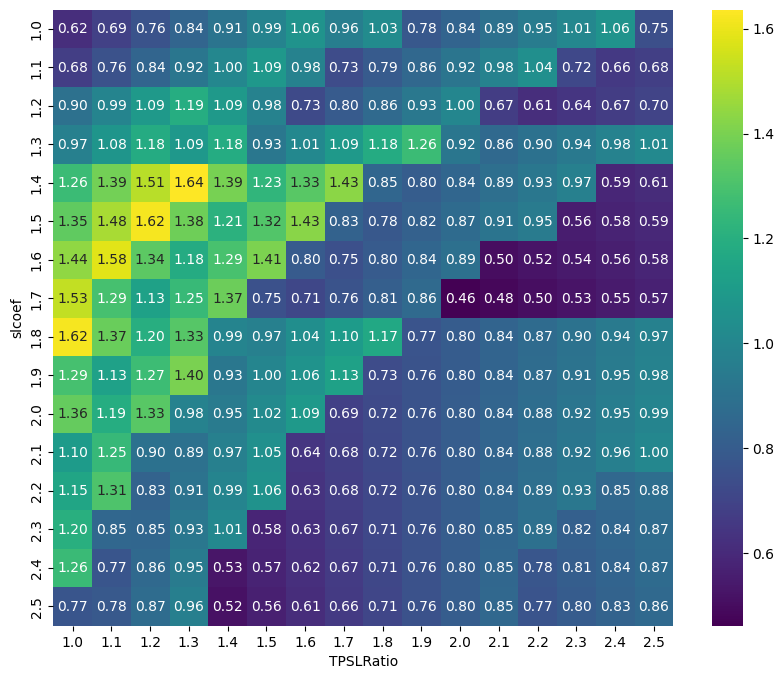

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.2f')
plt.show()

In [115]:
# find the one best parameters from heatmap_df
best_params = heatmap_df.idxmax()

# Find the maximum value over the entire DataFrame
max_value = heatmap_df.max().max()

# Find the index of the maximum value
best_params = (heatmap_df == max_value).stack().idxmax()

print(best_params)

strategy_parameters = {
  "slcoef": best_params[0],
  "tpslRatio": best_params[1]
}

(1.4, 1.3)


In [116]:
from backtesting import Strategy
from backtesting import Backtest

dftest = df[:]
def SIGNAL():
    return dftest.TotalSignal

trades_actions = []
margin = 1/500
cash = 100000
lot_size = 0.03

class MyStrat(Strategy):
    mysize = lot_size
    slcoef = strategy_parameters['slcoef']
    TPSLRatio = strategy_parameters['tpslRatio']
    
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio
        
        for trade in self.trades:
            if trade.is_long and self.data.RSI[-1]>=80:
                trade.close()
                # record trade action
                trades_actions.append({
                    "datetime": self.data.index[-1],
                    "trade_action": "close",
                    "entry_price": trade.entry_price,
                    "price": self.data.Close[-1],
                    "sl": None,
                    "tp": None,
                    "size": self.mysize,
                })
            elif trade.is_short and self.data.RSI[-1]<=20:
                trade.close()
                # record trade action
                trades_actions.append({
                    "datetime": self.data.index[-1],
                    "trade_action": "close",
                    "entry_price": trade.entry_price,
                    "price": self.data.Close[-1],
                    "sl": None,
                    "tp": None,
                    "size": self.mysize,
                })
       
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
            
            # record trade action
            trades_actions.append({
                "datetime": self.data.index[-1],
                "trade_action": "buy",
                "entry_price": self.data.Close[-1],
                "price": self.data.Close[-1],
                "sl": sl1,
                "tp": tp1,
                "size": self.mysize,
            })
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)
            
            # record trade action
            trades_actions.append({
                "datetime": self.data.index[-1],
                "trade_action": "sell",
                "entry_price": self.data.Close[-1],
                "price": self.data.Close[-1],
                "sl": sl1,
                "tp": tp1,
                "size": self.mysize,
            })

bt = Backtest(dftest, MyStrat, cash=cash, margin=margin)
bt.run()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/backtesting/_stats.py:123: RuntimeWarning:

divide by zero encountered in scalar divide



Start                     2024-04-01 00:00:00
End                       2024-04-19 21:45:00
Duration                     18 days 21:45:00
Exposure Time [%]                    5.292872
Equity Final [$]                112846.641977
Equity Peak [$]                 112846.641977
Return [%]                          12.846642
Buy & Hold Return [%]                 0.90824
Return (Ann.) [%]                  593.328634
Volatility (Ann.) [%]              125.725303
Sharpe Ratio                         4.719246
Sortino Ratio                             inf
Calmar Ratio                        701.33549
Max. Drawdown [%]                   -0.845998
Avg. Drawdown [%]                    -0.32821
Max. Drawdown Duration        0 days 03:00:00
Avg. Drawdown Duration        0 days 01:02:00
# Trades                                    9
Win Rate [%]                            100.0
Best Trade [%]                       0.213512
Worst Trade [%]                      0.052862
Avg. Trade [%]                    

In [117]:
trades_actions

[{'datetime': Timestamp('2024-04-01 20:00:00'),
  'trade_action': 'sell',
  'entry_price': 162.88999938964844,
  'price': 162.88999938964844,
  'sl': 162.96550256146068,
  'tp': 162.79184526629254,
  'size': 0.03},
 {'datetime': Timestamp('2024-04-02 19:15:00'),
  'trade_action': 'buy',
  'entry_price': 163.1540069580078,
  'price': 163.1540069580078,
  'sl': 163.07868065609816,
  'tp': 163.25193115049038,
  'size': 0.03},
 {'datetime': Timestamp('2024-04-03 22:45:00'),
  'trade_action': 'buy',
  'entry_price': 164.27000427246094,
  'price': 164.27000427246094,
  'sl': 164.17445626632338,
  'tp': 164.3942166804398,
  'size': 0.03},
 {'datetime': Timestamp('2024-04-04 06:45:00'),
  'trade_action': 'buy',
  'entry_price': 164.406005859375,
  'price': 164.406005859375,
  'sl': 164.33838985132428,
  'tp': 164.49390666984095,
  'size': 0.03},
 {'datetime': Timestamp('2024-04-04 12:45:00'),
  'trade_action': 'buy',
  'entry_price': 164.67999267578125,
  'price': 164.67999267578125,
  'sl': 1

In [118]:
bt.plot()

Row(id='32805', ...)

In [119]:
trades_actions = []

class MyStrat(Strategy):
    mysize = 0.03
    slcoef = strategy_parameters['slcoef']
    TPSLRatio = strategy_parameters['tpslRatio']
    
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio
        
        for trade in self.trades:
            if trade.is_long and self.data.RSI[-1]>=80:
                trade.close()
            elif trade.is_short and self.data.RSI[-1]<=20:
                trade.close()

        if len(self.trades)==1:
            self.trades[-1].sl = self.trades[-1].entry_price
       
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            tp2 = self.data.Close[-1] + slatr*TPSLRatio/2
            #tp2 = tp1 - slatr*TPSLRatio/2
            self.buy(sl=sl1, tp=tp1, size=self.mysize/2)
            self.buy(sl=sl1, tp=tp2, size=self.mysize/2)
            
            # record trade action
            trades_actions.append({
                "datetime": self.data.index[-1],
                "trade_direction": "buy",
                "entry_price": self.data.Close[-1],
                "sl": sl1,
                "tp": tp1,
                "size": self.mysize/2,
                "percentage_of_equity": (self.mysize/2) / self.equity
            })
            trades_actions.append({
                "datetime": self.data.index[-1],
                "trade_direction": "buy",
                "entry_price": self.data.Close[-1],
                "sl": sl1,
                "tp": tp2,
                "size": self.mysize/2,
                "percentage_of_equity": (self.mysize/2) / self.equity
            })
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            tp2 = tp1 = self.data.Close[-1] - slatr*TPSLRatio/2
            #tp2 = tp1 + slatr*TPSLRatio/2
            self.sell(sl=sl1, tp=tp1, size=self.mysize/2)
            self.sell(sl=sl1, tp=tp2, size=self.mysize/2)
            
            # record trade action
            trades_actions.append({
                "datetime": self.data.index[-1],
                "trade_direction": "sell",
                "entry_price": self.data.Close[-1],
                "sl": sl1,
                "tp": tp1,
                "size": self.mysize/2,
                "percentage_of_equity": (self.mysize/2) / self.equity
            })
            trades_actions.append({
                "datetime": self.data.index[-1],
                "trade_direction": "sell",
                "entry_price": self.data.Close[-1],
                "sl": sl1,
                "tp": tp2,
                "size": self.mysize/2,
                "percentage_of_equity": (self.mysize/2) / self.equity
            })

bt = Backtest(dftest, MyStrat, cash=1000000, margin=1/500)
bt.run()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/backtesting/_stats.py:123: RuntimeWarning:

divide by zero encountered in scalar divide



Start                     2024-04-01 00:00:00
End                       2024-04-19 21:45:00
Duration                     18 days 21:45:00
Exposure Time [%]                    4.022583
Equity Final [$]               1065976.151823
Equity Peak [$]                1065976.151823
Return [%]                           6.597615
Buy & Hold Return [%]                 0.90824
Return (Ann.) [%]                  171.322599
Volatility (Ann.) [%]               26.113513
Sharpe Ratio                         6.560688
Sortino Ratio                             inf
Calmar Ratio                       404.098533
Max. Drawdown [%]                   -0.423962
Avg. Drawdown [%]                   -0.232057
Max. Drawdown Duration        1 days 01:45:00
Avg. Drawdown Duration        0 days 04:06:00
# Trades                                   18
Win Rate [%]                        88.888889
Best Trade [%]                       0.106756
Worst Trade [%]                           0.0
Avg. Trade [%]                    

In [120]:
trades_actions

[{'datetime': Timestamp('2024-04-01 20:00:00'),
  'trade_direction': 'sell',
  'entry_price': 162.88999938964844,
  'sl': 162.96550256146068,
  'tp': 162.84092232797047,
  'size': 0.015,
  'percentage_of_equity': 1.5e-08},
 {'datetime': Timestamp('2024-04-01 20:00:00'),
  'trade_direction': 'sell',
  'entry_price': 162.88999938964844,
  'sl': 162.96550256146068,
  'tp': 162.84092232797047,
  'size': 0.015,
  'percentage_of_equity': 1.5e-08},
 {'datetime': Timestamp('2024-04-02 19:15:00'),
  'trade_direction': 'buy',
  'entry_price': 163.1540069580078,
  'sl': 163.07868065609816,
  'tp': 163.25193115049038,
  'size': 0.015,
  'percentage_of_equity': 1.4932980795088863e-08},
 {'datetime': Timestamp('2024-04-02 19:15:00'),
  'trade_direction': 'buy',
  'entry_price': 163.1540069580078,
  'sl': 163.07868065609816,
  'tp': 163.20296905424908,
  'size': 0.015,
  'percentage_of_equity': 1.4932980795088863e-08},
 {'datetime': Timestamp('2024-04-03 22:45:00'),
  'trade_direction': 'buy',
  'ent

In [121]:
bt.plot()

Row(id='34010', ...)